# Gold Amount Prediction Modeling

This project aims to create machine learning to predict the amount of gold from the extraction process to optimize production. The steps taken are loading data and checking data quality, conducting exploratory data, followed by exploratory data analysis, then creating a model.

# Table of Content:
1. Load Dataset and Quality Checking
2. Eksploratory Data
3. Eksploratory Data Analysis
4. Model
5. Conclusion

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import levene
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Load Dataset and Quality Checking

In [51]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [52]:
test = pd.read_csv('/datasets/gold_recovery_test.csv')
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [55]:
train.isnull().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [56]:
test.isnull().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [57]:
test.duplicated().sum()

0

In [58]:
train.duplicated().sum()

0

Note: From load data and quality checking it was found that there were missing values. Meanwhile there is no duplicate data and the data type is appropriate.

## Eksploratory Data

In [59]:
train[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','rougher.output.recovery']]

,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,rougher.output.recovery
0,6.486150,19.793808,34.174427,87.107763
1,6.478583,20.050975,34.118526,86.843261
2,6.362222,19.737170,33.969464,86.842308
3,6.118189,19.320810,28.260743,87.226430
4,5.663707,19.216101,33.044932,86.688794
...,...,...,...,...
16855,5.335862,18.603550,32.940215,89.574376
16856,4.838619,18.441436,32.925325,87.724007
16857,4.525061,15.111231,31.856742,88.890579
16858,4.362781,17.834772,30.770892,89.858126


In [60]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['primary_cleaner.output.concentrate_au']

perolehan = (C * (F - T)) / (F * (C - T))

In [61]:
perolehan

0        5.875715
1        6.080988
2        6.017612
3        7.821605
4        6.717875
           ...   
16855    6.713062
16856    7.390756
16857    5.450588
16858    8.345213
16859    8.444679
Length: 16860, dtype: float64

In [62]:
# counting MAE
abs(train['rougher.output.recovery'] - perolehan).replace([np.inf, -np.inf], np.nan).mean()

77.64712212949055

In [63]:
# Checking for features that are not available in the dataset
unavailable_cols = [column for column in train.columns if column not in test.columns]
unavailable_cols

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [64]:
# Divide into X_train and y_train
train = train.loc[(~train['rougher.output.recovery'].isnull()) & (~train['final.output.recovery'].isnull())]
X_basic = train.drop(unavailable_cols, axis=1).drop('date', axis=1)
y_basic = train[['final.output.recovery','rougher.output.recovery']]

In [65]:
# Filling missing values
for col in X_basic.columns:
    mean = X_basic[col].mean()
    X_basic[col]=X_basic[col].fillna(mean)
    test[col]=test[col].fillna(mean)

In [66]:
# Check whether all data has been filled in
X_basic.isnull().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [67]:
test.isnull().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [68]:
#Train validation split
X_train, X_val, y_train, y_val = train_test_split(X_basic, y_basic, test_size=0.25, random_state=12)

In [69]:
#Membersihkan data test 
X_test = test.drop('date', axis=1)

Note: For empty values, fill in the mean or average. Here we will find the acquisition value using the formula that has been given. The MAE value is 77.6.

## Eksploratory Data Analisis

**Analyze how the metal concentration (Au, Ag, Pb)**

In [70]:
flow_au = train[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au',
                 'final.output.concentrate_au']].median().reset_index()
flow_au.columns = ['flow', 'concentrate']
flow_au

,flow,concentrate
0,rougher.input.feed_au,7.649138
1,rougher.output.concentrate_au,19.947312
2,primary_cleaner.output.concentrate_au,33.225835
3,final.output.concentrate_au,44.872436


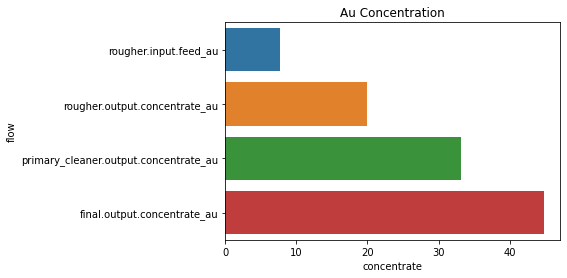

In [71]:
plt.title('Au Concentration')
sns.barplot(data=flow_au, x='concentrate', y='flow')
plt.show()

Note: Concentration at each stage always increases.

In [72]:
flow_ag = train[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag',
                 'final.output.concentrate_ag']].median().reset_index()
flow_ag.columns = ['flow', 'concentrate']
flow_ag

,flow,concentrate
0,rougher.input.feed_ag,8.156092
1,rougher.output.concentrate_ag,11.747362
2,primary_cleaner.output.concentrate_ag,8.226247
3,final.output.concentrate_ag,4.994652


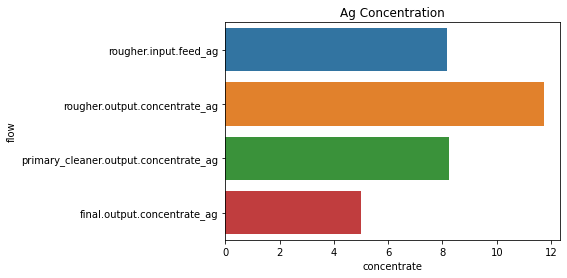

In [73]:
plt.title('Ag Concentration')
sns.barplot(data=flow_ag, x='concentrate', y='flow')
plt.show()

Description: The initial concentration was around 7.9, then after taking the concentrate the concentration increased to 11.4, then fell again.

In [74]:
flow_pb = train[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb',
                 'final.output.concentrate_pb']].median().reset_index()
flow_pb.columns = ['flow', 'concentrate']
flow_pb

,flow,concentrate
0,rougher.input.feed_pb,3.422677
1,rougher.output.concentrate_pb,7.760435
2,primary_cleaner.output.concentrate_pb,9.933520
3,final.output.concentrate_pb,10.297144


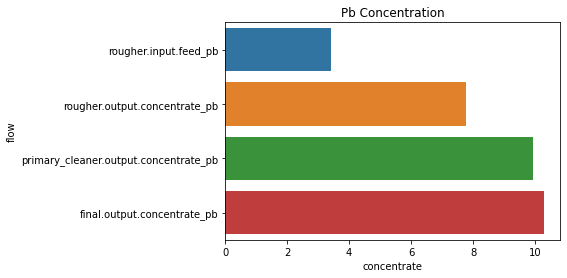

In [75]:
plt.title('Pb Concentration')
sns.barplot(data=flow_pb, x='concentrate', y='flow')
plt.show()

Note: Every process in Pb (lead) experiences an increase in concentration.

**Comparing the feed particle size distribution in the training set and test set**

In [76]:
def levene_variance(series1, series2, alpha=0.05):
    p_value_levene = levene(series1, series2).pvalue
    print(f'P-value: {p_value_levene}')
    print(f'Alpha: {alpha}')
    if p_value_levene >= alpha:
        print('H0 DITERIMA: Kedua data memiliki variansi sama')
    else:
        print('H1 DITERIMA: Kedua data memiliki variansi TIDAK sama')

In [77]:
feeds = [column for column in X_basic.columns if 'feed' in column]
for column in feeds:
    print(column)
    levene_variance(X_basic[column], X_test[column])
    print('------------------------\n')

primary_cleaner.input.feed_size
P-value: 0.29160196970934205
Alpha: 0.05
H0 DITERIMA: Kedua data memiliki variansi sama
------------------------

rougher.input.feed_ag
P-value: 2.94608587901463e-98
Alpha: 0.05
H1 DITERIMA: Kedua data memiliki variansi TIDAK sama
------------------------

rougher.input.feed_pb
P-value: 1.420060669082506e-10
Alpha: 0.05
H1 DITERIMA: Kedua data memiliki variansi TIDAK sama
------------------------

rougher.input.feed_rate
P-value: 2.973896497923603e-139
Alpha: 0.05
H1 DITERIMA: Kedua data memiliki variansi TIDAK sama
------------------------

rougher.input.feed_size
P-value: 0.10178486021014241
Alpha: 0.05
H0 DITERIMA: Kedua data memiliki variansi sama
------------------------

rougher.input.feed_sol
P-value: 2.3730230021152024e-247
Alpha: 0.05
H1 DITERIMA: Kedua data memiliki variansi TIDAK sama
------------------------

rougher.input.feed_au
P-value: 4.940941958359561e-44
Alpha: 0.05
H1 DITERIMA: Kedua data memiliki variansi TIDAK sama
-----------------

Note: There are 3 columns with the same variance and 4 columns with different variances.

**Considering the total concentration of all substances at different stages: raw feed, coarser concentration and final concentration**

In [78]:
flow_au = train[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au',
                 'final.output.concentrate_au']]

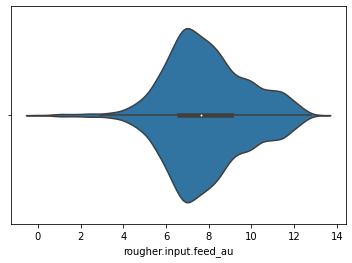

In [79]:
sns.violinplot(data=flow_au, x='rougher.input.feed_au')
plt.show()

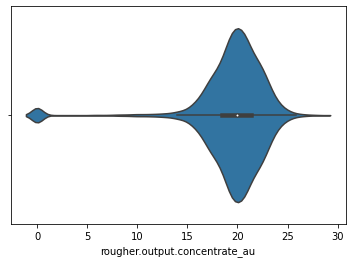

In [80]:
sns.violinplot(data=flow_au, x='rougher.output.concentrate_au')
plt.show()

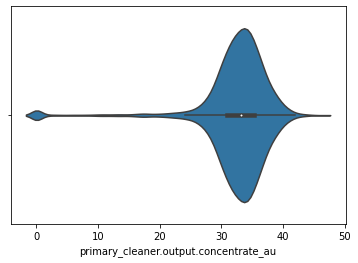

In [81]:
sns.violinplot(data=flow_au, x='primary_cleaner.output.concentrate_au')
plt.show()

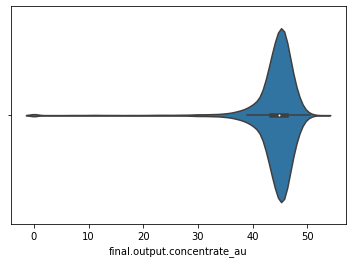

In [82]:
sns.violinplot(data=flow_au, x='final.output.concentrate_au')
plt.show()

Note: of all the plot shapes obtained, all distributions are normal distributions even though there are quite a few 0 values. This shows that of the many rocks extracted, there are quite a few that do not produce any gold at all.

## Model

In [83]:
#Function sMAPE
def smape (y_true, y_pred):
    temp = pd.DataFrame({'true': list(y_true),'pred': list(y_pred)})
    ape = abs(temp['true'] - temp['pred']) / ((abs(temp['true']) + abs(temp['pred'])) / 2)
    mape = ape.mean()
    return mape

def final_smape (y_trues, y_preds):
    y_trues = pd.DataFrame(y_trues)
    y_preds = pd.DataFrame(y_preds)
    rough_smape = smape(y_trues.iloc[:, 0], y_preds.iloc[:, 0])
    final_smape = smape(y_trues.iloc[:, 1], y_preds.iloc[:, 1])
    smape_akhir = 0.25 * rough_smape + 0.75 * final_smape
    print(f'Nilai SMAPE:{round(smape_akhir, 2)*100}%')
    return smape_akhir

**Linear Regression**

In [84]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [85]:
y_train_pred = lr.predict(X_train)
smape_train = final_smape (y_train, y_train_pred)

Nilai SMAPE:10.0%


In [86]:
y_val_pred = lr.predict(X_val)
smape_train = final_smape(y_val, y_val_pred)

Nilai SMAPE:10.0%


Note: From the train data, the test data shows that the SMAPE values ​​are both 10% or the model is consistent, which means that our error from the prediction results is 10% error from the actual data.

**DecisionTreeRegressor**

In [87]:
dt = DecisionTreeRegressor(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [88]:
y_train_pred = dt.predict(X_train)
smape_train = final_smape (y_train, y_train_pred)

Nilai SMAPE:8.0%


In [89]:
y_val_pred = dt.predict(X_val)
smape_train = final_smape(y_val, y_val_pred)

Nilai SMAPE:9.0%


Description: DecisionTreeRegressor machine learning model is better than Linear Regression.

**Random Forest**

In [90]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10)

In [91]:
y_train_pred = rf.predict(X_train)
smape_train = final_smape (y_train, y_train_pred)

Nilai SMAPE:5.0%


In [92]:
y_val_pred = rf.predict(X_val)
smape_train = final_smape(y_val, y_val_pred)

Nilai SMAPE:8.0%


Description: the RandomForestRegressor machine learning model has the best results than the other two models.

__Data Testing Prediction__

In [93]:
full = pd.read_csv('/datasets/gold_recovery_full.csv')
X_test = test.drop(['date'], axis=1).reset_index(drop=True)
y_test = full[['rougher.output.recovery','final.output.recovery']].loc[test.index].reset_index(drop=True)

In [94]:
y_test_pred = rf.predict(X_test)
smape_test = final_smape (y_test, y_test_pred)

Nilai SMAPE:26.0%


Note: The SMAPE value for testing data was found to be very large, namely 27%.

## Conclusion

We create machine learning to predict the amount of gold from the extraction process to optimize production. The steps that have been taken are to load the data to see what the data content is like, then check the quality of the data such as whether there are duplicates or missing values, then carry out exploratory data such as calculating MAE, followed by exploratory data analysis such as recording metal concentrations in the refining process, then create a machine learning model. The conclusions are:
1. There are missing data values ​​so we fill them with the mean.
2. The gold concentration in each extraction process always increases from the initial 7.6 until the output becomes 44.8.
3. Distribution of feed particle sizes in the training set and test set, we found 3 columns with the same variance and 4 columns with different variances.
4. In making machine learning, random forest regressor is the best model with an smape value of 5% for the training set and 8% for the validation set with estimators=10 and max depth=20.